## Simple Unsupervised Learning Example

Use Labelled Iris Flower DataSet to demonstrate unsupervised learning clustering with a kmeans model.

In [1]:
import pandas as pd

Load the dataset, adding column names to the loaded DataFrame

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

col_names = ['sepal-length', 'sepal-width', 'petal-length',
             'petal-width', 'class']

iris_df = pd.read_csv(url, names=col_names)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A quick look at how many classes of Iris there are

In [3]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Separate the dataframe into:

* X: independent variable matrix  - this is the first 4 columns
* y: dependant variable vector    - this is just the 'class' column

In [4]:
X = iris_df.iloc[:,:4]

y = iris_df[ ['class'] ]

display(X.head())
display(y)

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### KMeans clustering model

In [5]:
from sklearn.cluster import KMeans

k_means_model = KMeans(n_clusters=3)

k_means_model.fit(X)

KMeans(n_clusters=3)

In [6]:
k_means_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Verify the model against the original labels

Note how the model may have chosen a different "code" for each of the classes than we are using below. For simplicity you can change the class code (0, 1 or 2) below to match what the model has assigned.

In [7]:
verification_data = iris_df[ ['class'] ].copy()

verification_data['label'] = 0   # This is the code for Iris-setosa
verification_data.loc[ verification_data['class'] == 'Iris-versicolor', 'label'] = 1
verification_data.loc[ verification_data['class'] == 'Iris-virginica', 'label'] = 2

verification_data

,class,label
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(k_means_model.labels_, verification_data['label']))

[[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]


# ? How to determine the number of clusters ?

A common method is called the elbow method, here we run the algorithm for a number of cluster sizes, and plot the results

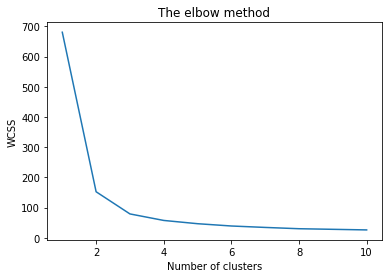

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Reference - a more complete example:
https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset